In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass
from tiffConverter import convert_to_numpy, convert_to_tiff
from pltwidget import runwidget
from helperFunctions import MoviePlotter

In [2]:
aligned_proj_location = "alignedProjections/aligned_baseCase_Filter_XCtip_20241004-100555.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)

notAligned_proj_location = "data/fullTomoReconstructions_8_28_24.tif"
notAlignedProjections, notAligned_proj_scale_info = convert_to_numpy(notAligned_proj_location)

In [32]:
def plot_two_centroids(data_3d_1, data_3d_2):
    """
    Accepts two 3D numpy arrays, where the first dimension is the index 
    and the other two dimensions are 2D images. Normalizes the images 
    to be positive, calculates the centroid of the grayscale values for 
    each 2D image in both arrays, focusing only on the center 50% by 50% 
    region, and plots them on the same scatterplot in two different colors.

    Parameters:
        data_3d_1 (numpy.ndarray): First 3D numpy array of shape (n, height, width).
        data_3d_2 (numpy.ndarray): Second 3D numpy array of shape (n, height, width).
    """
    def normalize_image(img):
        """Shift the image to make all values positive."""
        # return img - np.min(img)
        return np.square(img)

    def calculate_centroids(data_3d):
        """Helper function to calculate centroids for the center 50% region of a 3D array."""
        centroids = []
        for img in data_3d:
            # Normalize the image to ensure all values are positive
            normalized_img = normalize_image(img)

            # Focus only on the center 50% region
            h, w = normalized_img.shape
            h_start, h_end = h // 5, 4 * h // 5  # Center 50% in height
            w_start, w_end = w // 5, 4 * w // 5  # Center 50% in width
            cropped_img = normalized_img[h_start:h_end, w_start:w_end]
            # cropped_img = normalized_img
            
            # Calculate centroid
            centroid = center_of_mass(cropped_img)
            
            # Adjust the centroid to the original image coordinates
            if centroid[0] is not None and centroid[1] is not None:
                centroids.append((centroid[0] - (h_end-h_start)/2, centroid[1] - (w_end-w_start)/2))
                # centroids.append((centroid[0] -h/2, centroid[1]-w/2))
            else:
                centroids.append((np.nan, np.nan))  # Handle empty images
        return np.array(centroids)

    # Ensure both inputs are 3D arrays
    if len(data_3d_1.shape) != 3 or len(data_3d_2.shape) != 3:
        raise ValueError("Both input arrays must be 3-dimensional.")

    # Calculate centroids for both datasets
    centroids_1 = calculate_centroids(data_3d_1)
    centroids_2 = calculate_centroids(data_3d_2)

    # Extract x and y coordinates
    y_coords_1, x_coords_1 = centroids_1[:, 0], centroids_1[:, 1]
    y_coords_2, x_coords_2 = centroids_2[:, 0], centroids_2[:, 1]

    # Create scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords_1, y_coords_1, color="blue", label="Projections Post-Alignment")
    plt.scatter(x_coords_2, y_coords_2, color="red", label="Projections Pre-Alignment")
    plt.gca().invert_yaxis()  # Invert y-axis to align with image coordinate systems
    plt.xlabel("X Coordinate",fontsize=16)
    plt.ylabel("Y Coordinate", fontsize=16)
    plt.title("Center of Mass of Projections Pre/Post Alignment", fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()
    
    for i in range(10):
        # Focus only on the center 50% region
        h, w = data_3d_1[i*20].shape
        h_start, h_end = h // 5, 4 * h // 5  # Center 50% in height
        w_start, w_end = w // 5, 4 * w // 5  # Center 50% in width
        cropped_img = data_3d_1[i*20][h_start:h_end, w_start:w_end]

        plt.imshow(data_3d_1[i*20][h_start:h_end, w_start:w_end])
        plt.scatter(x_coords_1[i*20] + (w_end-w_start)/2, y_coords_1[i*20]+(h_end-h_start)/2,  color = "blue")
        plt.show()


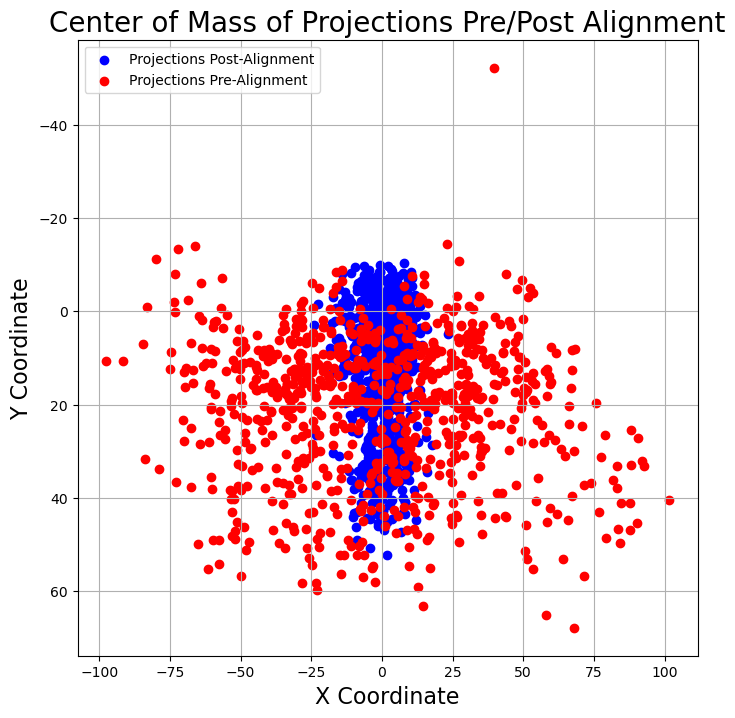

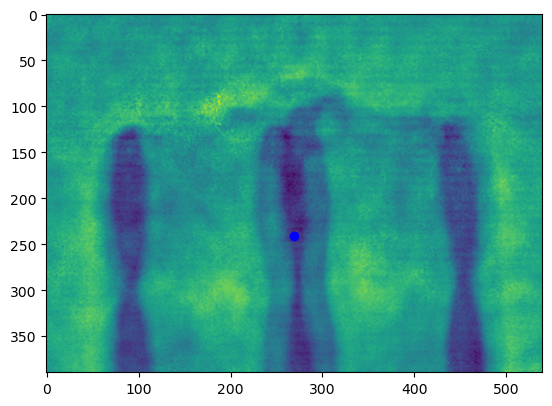

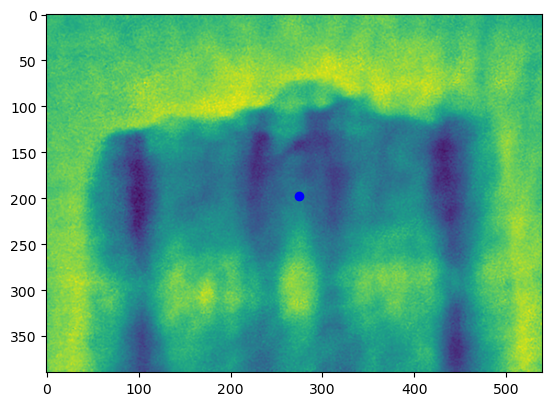

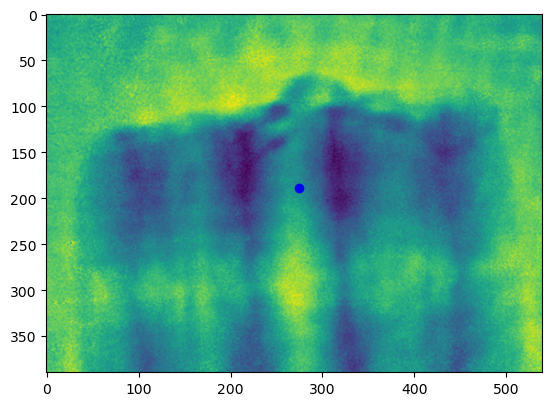

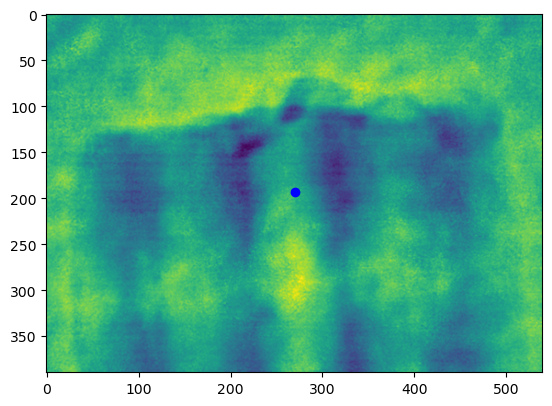

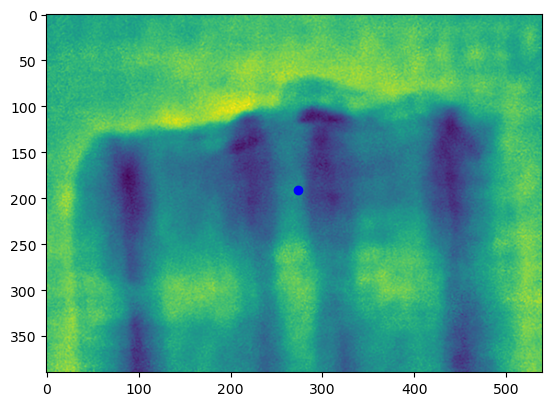

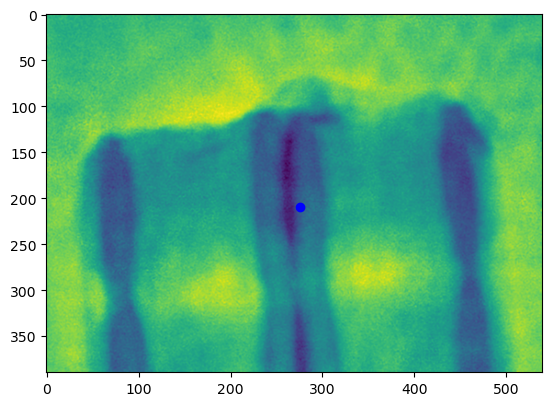

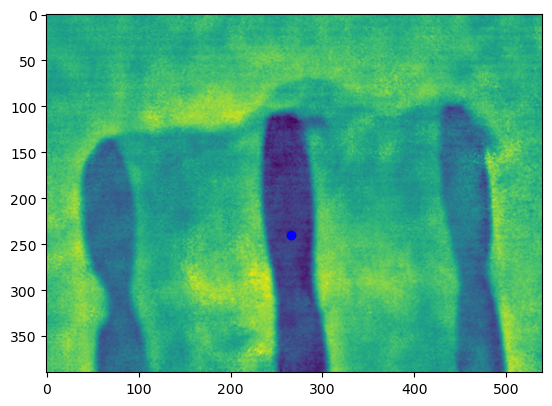

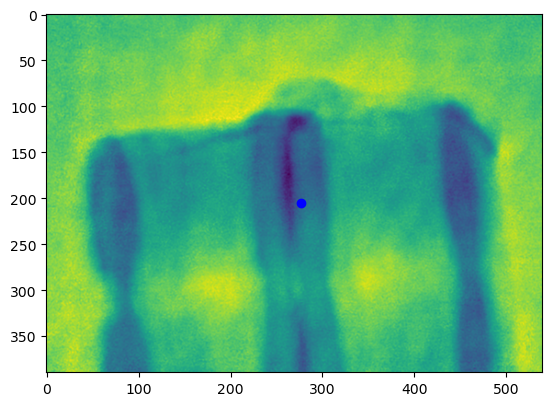

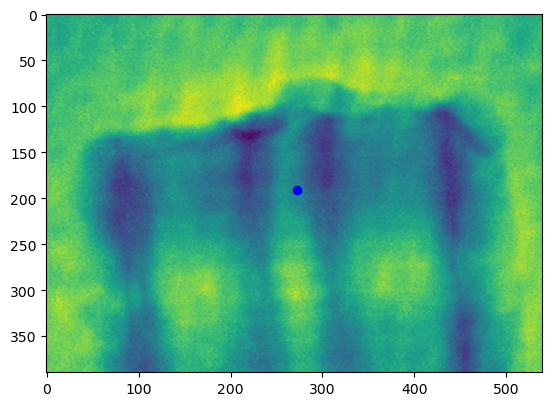

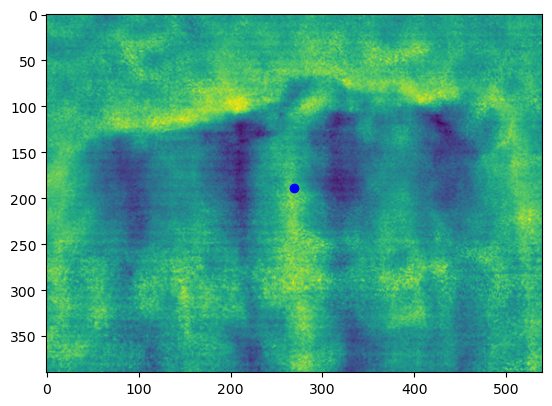

In [33]:
# Plot the centroids
plot_two_centroids(kevinProjections, notAlignedProjections)

(323.43219284749944, 449.3674533844005)
(650, 900)


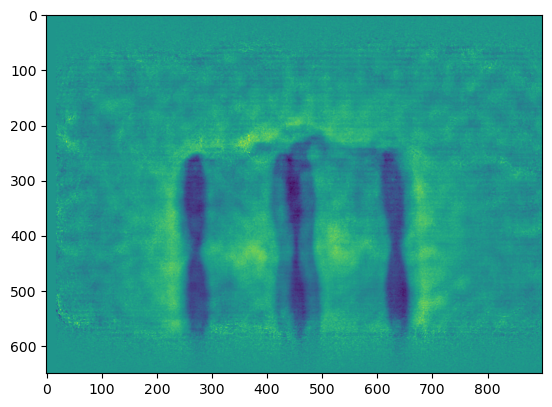

In [31]:
def normalize_image(img):
    """Shift the image to make all values positive."""
    return img - np.min(img)

centroid = center_of_mass(normalize_image(kevinProjections[0]))
print(centroid)
print(kevinProjections[0].shape)
plt.imshow(kevinProjections[0])
plt.show()

In [ ]:
# runwidget(kevinProjections[0:100])
MoviePlotter(notAlignedProjections[0:10,130:-130, 180:-180])